## Group assignment 2
IEC2016012   
IEC2016027   
IEC2016072   
IEC2016065   
ECM2016003   

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [8]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Linear Regression using Normal Equation

In [9]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']] #
y = df['price']

In [10]:
print(x.shape, y.shape)

(546, 5) (546,)


In [11]:
w = np.linalg.inv(x.T@x)@x.T@y
print(w.shape)

(5,)


In [12]:
h = np.dot(x,w)
h.shape

(546,)

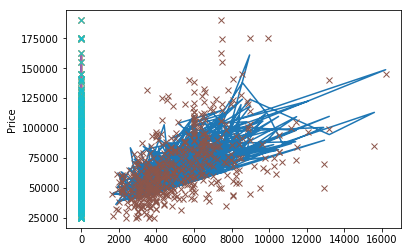

Note: If x consists of more than one feature, the plot would not make any sense.
Reason: The n-dimensions (n features) would be displayed in 2 dimentions.


In [13]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()
print("Note: If x consists of more than one feature, the plot would not make any sense.")
print("Reason: The n-dimensions (n features) would be displayed in 2 dimentions.")

In [14]:
def compute_score(h,y):
    return np.sum((np.abs(np.divide(h-y,y))))/h.size

In [15]:
score_unreg = compute_score(h,y)
print("Score using Linear Regression without Regularization: " + str(score_unreg))

Score using Linear Regression without Regularization: 0.20734946329186082


In [16]:
lam_list = np.arange(10,50,0.1)
scores = []

for lam in lam_list:
    w = np.linalg.inv(x.T@x+lam)@x.T@y
    h = np.dot(x,w)
    scores.append((lam,compute_score(h,y)))

for (lam, score) in scores:
    print("Lambda = " +str(lam) + ", Score = " + str(score))
    
lam_best,score_best = min(scores, key=lambda item:item[1])
print("\nLambda for best fit would be: \nLambda = " + str(lam_best) + ", Score = " + str(score_best))

Lambda = 10.0, Score = 0.20610979141612998
Lambda = 10.1, Score = 0.2061018782398632
Lambda = 10.2, Score = 0.20609397562558912
Lambda = 10.299999999999999, Score = 0.2060860835521758
Lambda = 10.399999999999999, Score = 0.20607820199854782
Lambda = 10.499999999999998, Score = 0.20607033094368538
Lambda = 10.599999999999998, Score = 0.20606247036662487
Lambda = 10.699999999999998, Score = 0.20605462024645804
Lambda = 10.799999999999997, Score = 0.20604678056233297
Lambda = 10.899999999999997, Score = 0.20603895129345276
Lambda = 10.999999999999996, Score = 0.20603113241907595
Lambda = 11.099999999999996, Score = 0.20602332391851624
Lambda = 11.199999999999996, Score = 0.20601552577114046
Lambda = 11.299999999999995, Score = 0.20600773795637303
Lambda = 11.399999999999995, Score = 0.20600002967049588
Lambda = 11.499999999999995, Score = 0.20599278057171463
Lambda = 11.599999999999994, Score = 0.20598554105899566
Lambda = 11.699999999999994, Score = 0.2059783111133361
Lambda = 11.7999999

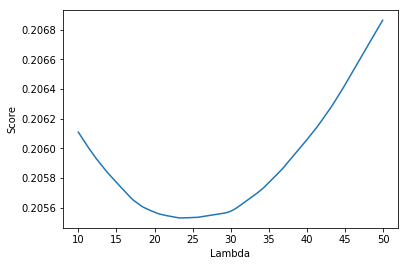

In [17]:
score_list = [x[1] for x in scores]
plt.plot(lam_list, score_list)
plt.xlabel("Lambda")
plt.ylabel("Score")
plt.show()

In [18]:
print("Thus infering from the graph above, a suitable value of lambda would be around:\nLambda = 23.3")

Thus infering from the graph above, a suitable value of lambda would be around:
Lambda = 23.3


In [19]:
for i,j in scores:
    if i==3500:
        print("Score for Lambda = " + str(i) + ", score = " + str(j))
        
print("Score without regularization: " + str(score_unreg))

Score without regularization: 0.20734946329186082


### Prediction

In [20]:
try:
    test = np.array([4500, 3, 2, 2, 2])
    val = np.dot(test,w)
    print("%8s | %8s | %9s | %8s | %8s" % ("Lotsize", "Bedrooms", "Bathrooms", "Stories", "Garage"))
    print("%8d | %8d | %9d | %8d | %8d" % (test[0],test[1],test[2],test[3],test[4]))
    print("The predicted value for: " + str(val))
except Exception as e:
    print("Give correct number of inputs to predict")
    print(e)

 Lotsize | Bedrooms | Bathrooms |  Stories |   Garage
    4500 |        3 |         2 |        2 |        2
The predicted value for: 75847.24976964867


# Gradient Descent

In [21]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [22]:
# Normalizing x and y
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [23]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 5)
y.shape: (546,)
m: 546
n: 5
x.shape after appending a column for bias: (546, 6)


In [24]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


In [25]:
def compute_h(w,x):
    return np.dot(x,w.T)

def gd(x,y,w,alpha=0.001,t=10000,lam=2000):
    temp = np.zeros((n+1,1))
    iterations = 0
    cost_log = []
    while(iterations<t):
        h = compute_h(w,x)
        for i in range(n+1):
            temp[i] = w[:,i]*(1-(alpha*lam/m)) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
        for i in range(n+1):
            w[:,i] = temp[i]
        J = (1/(2*m))*np.sum(np.square(h-y))
        cost_log = np.append(cost_log, J)
        iterations+=1
    
    return cost_log

In [26]:
# h = np.dot(x,w.T)
# plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
# plt.xlabel('Lotsize')
# plt.ylabel('Price')
# plt.show()

### Without regularization

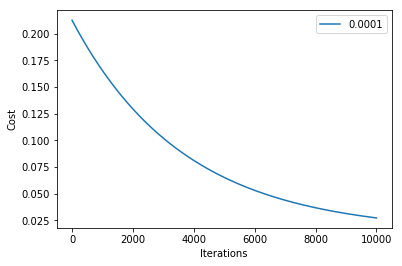

Alpha = 0.0001, Minimum cost = 0.027402868732902517


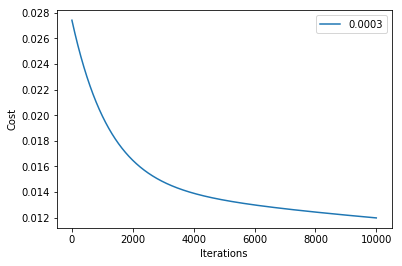

Alpha = 0.0003, Minimum cost = 0.011991757935469985


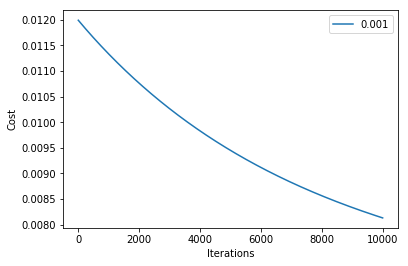

Alpha = 0.001, Minimum cost = 0.008130262518231051


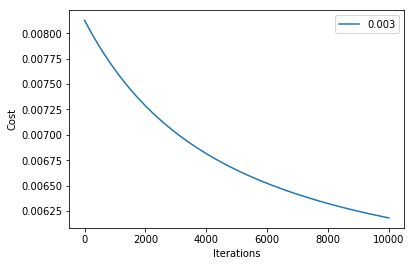

Alpha = 0.003, Minimum cost = 0.006180467884387236


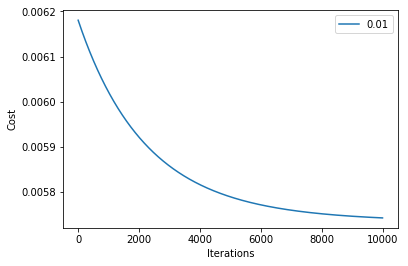

Alpha = 0.01, Minimum cost = 0.005742910392758305


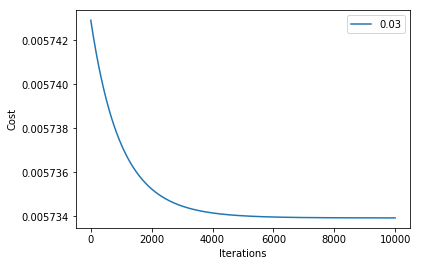

Alpha = 0.03, Minimum cost = 0.00573392922201971


In [27]:
t = 10000 #No of iterations
it = np.arange(t)
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
cost_logs = []
min_costs = []

for alpha in alphas:
    cost_log = gd(x,y,w,alpha,t,0)  #Regularization = 0
    
    plt.plot(it, cost_log, label=alpha)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
    
    cost_logs.append((alpha, cost_log))
    min_costs.append((alpha, min(cost_log)))
    print("Alpha = " + str(alpha) + ", Minimum cost = " + str(min(cost_log)))

In [28]:
alpha_best = min(min_costs, key=lambda item: item[1])
print("For best fit:")
print("Alpha = " + str(alpha_best[0]) + ", Loss = " + str(alpha_best[1]))

For best fit:
Alpha = 0.03, Loss = 0.00573392922201971


### With regularization

--------------------------------------------------------
Alpha:0.0001
--------------------------------------------------------


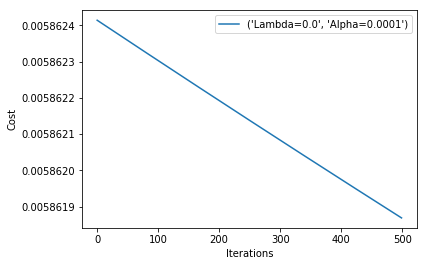

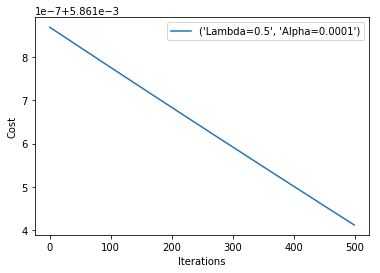

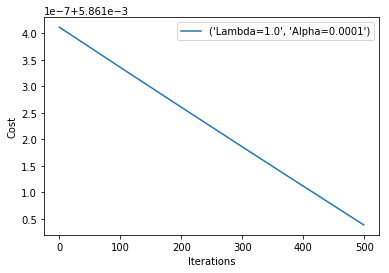

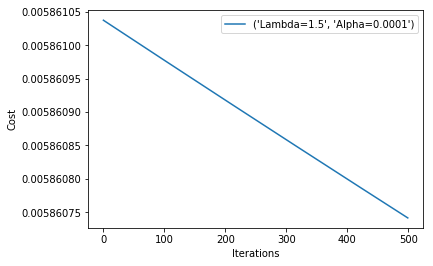

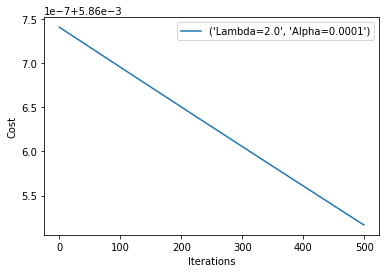

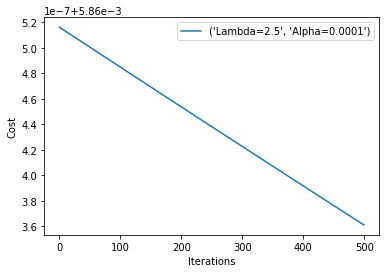

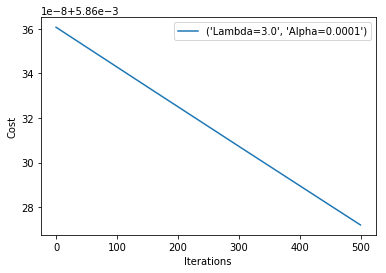

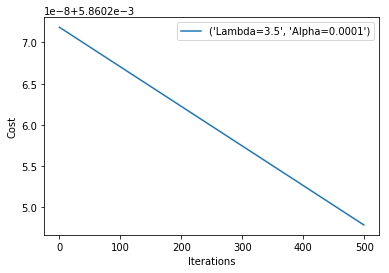

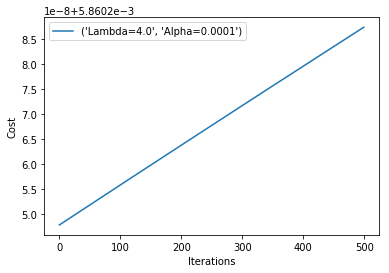

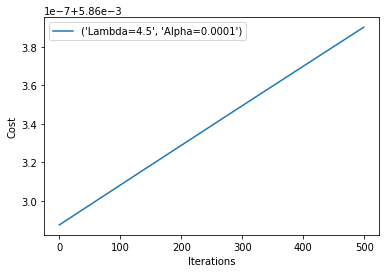

--------------------------------------------------------
--------------------------------------------------------
Alpha:0.0003
--------------------------------------------------------


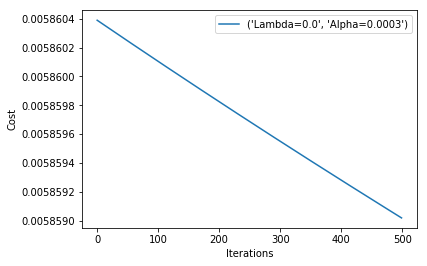

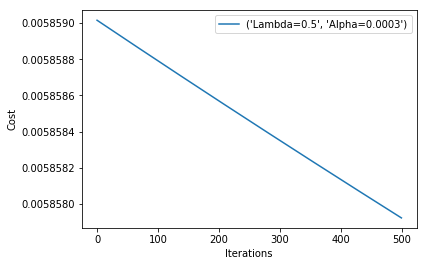

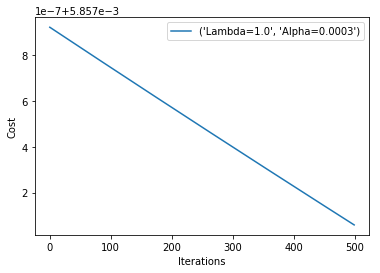

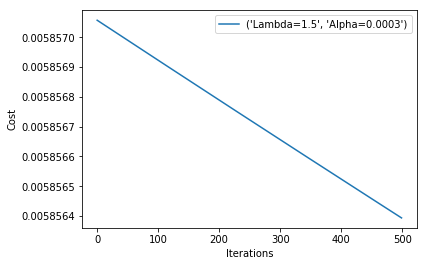

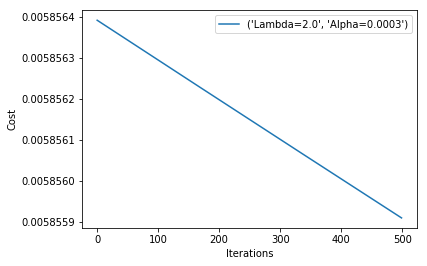

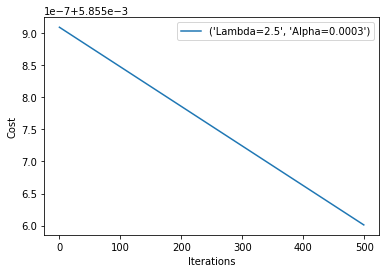

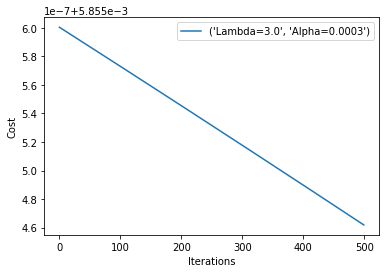

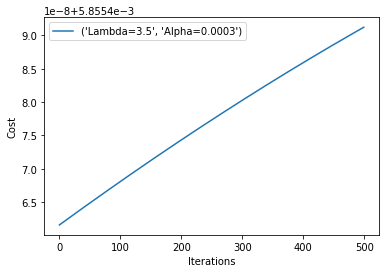

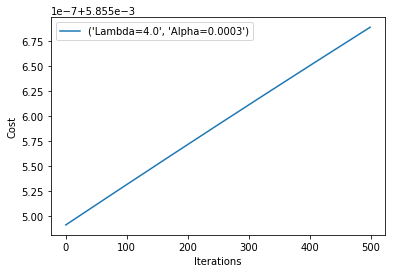

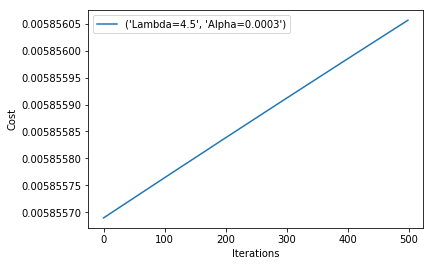

--------------------------------------------------------
--------------------------------------------------------
Alpha:0.001
--------------------------------------------------------


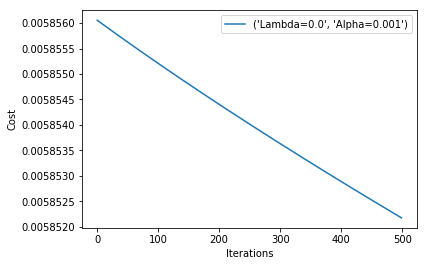

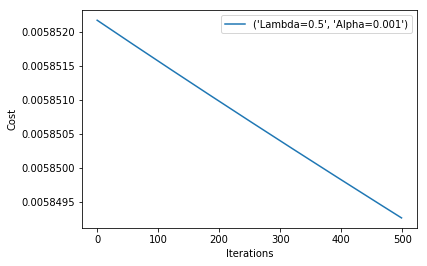

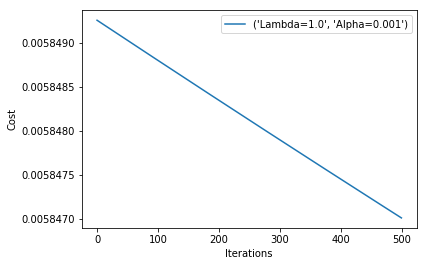

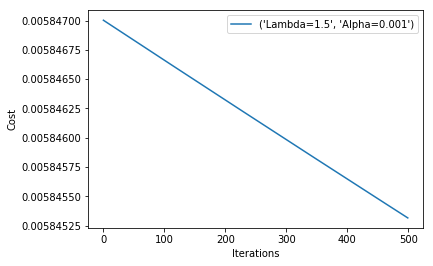

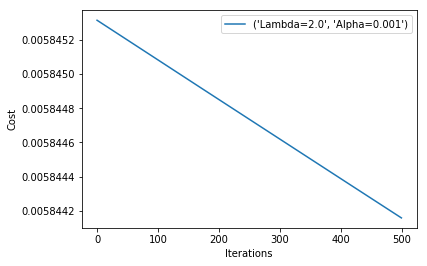

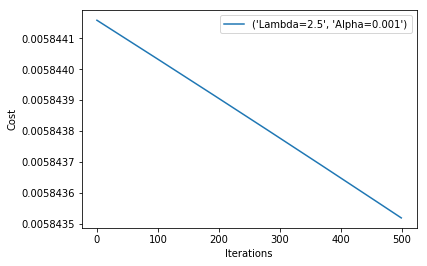

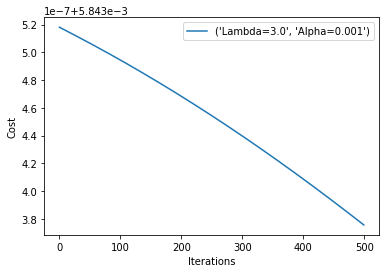

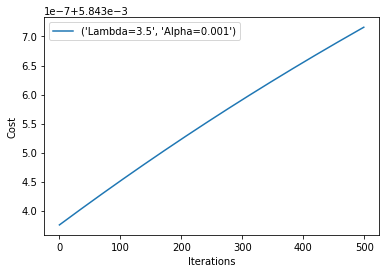

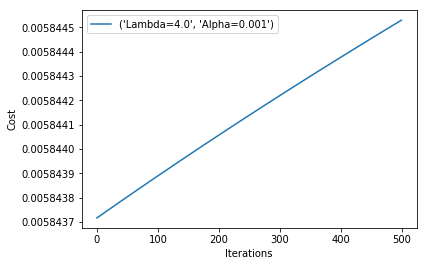

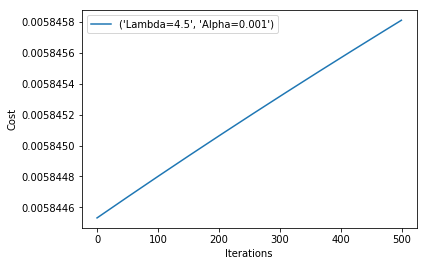

--------------------------------------------------------
--------------------------------------------------------
Alpha:0.003
--------------------------------------------------------


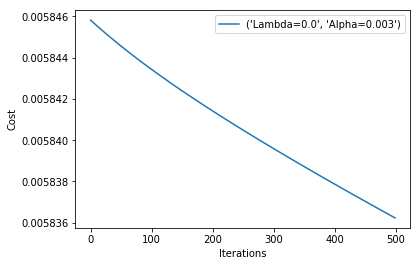

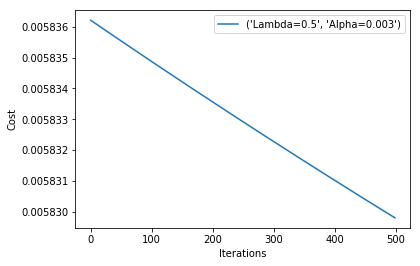

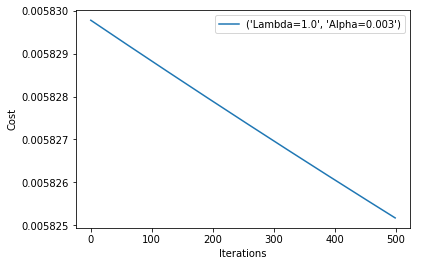

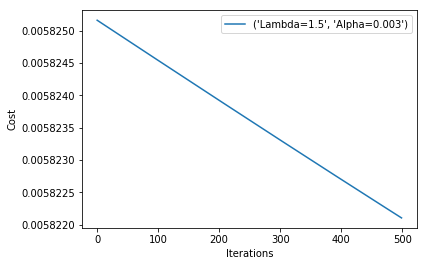

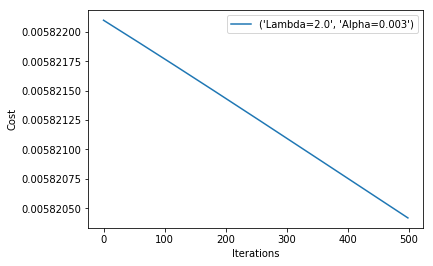

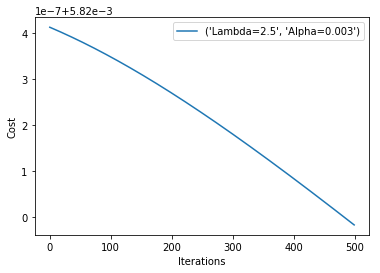

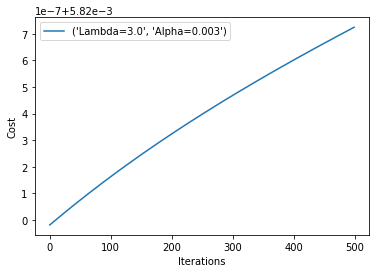

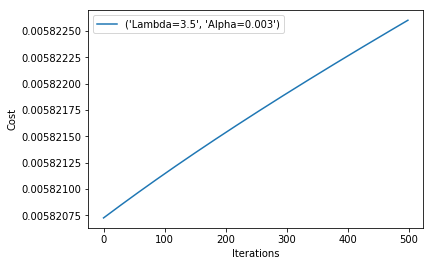

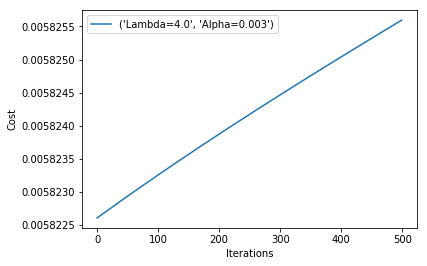

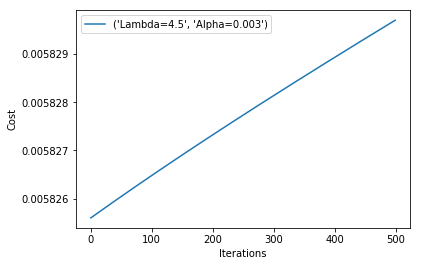

--------------------------------------------------------
--------------------------------------------------------
Alpha:0.01
--------------------------------------------------------


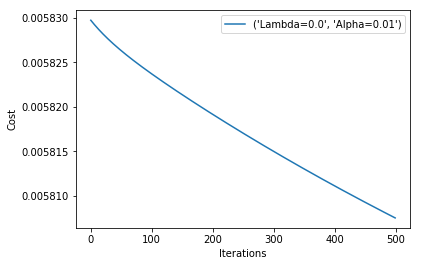

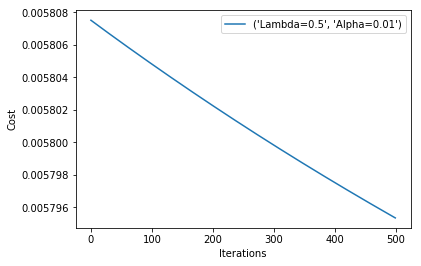

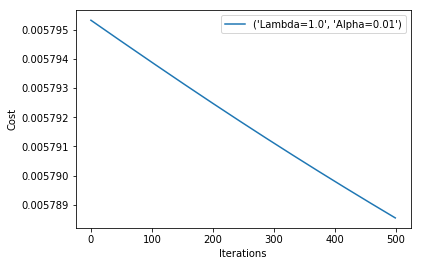

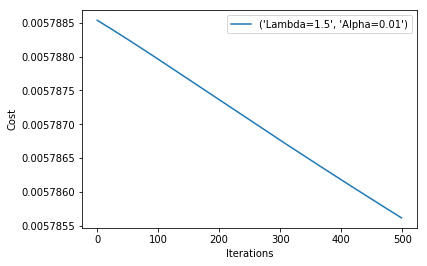

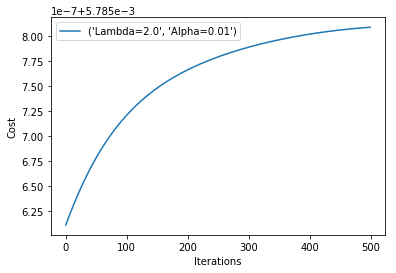

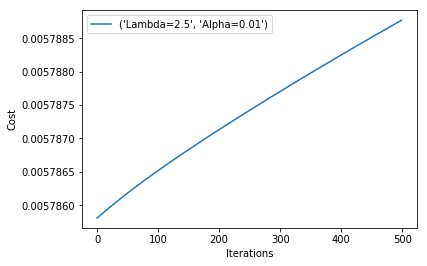

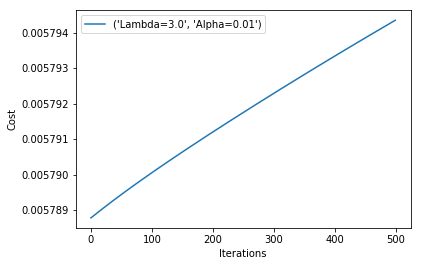

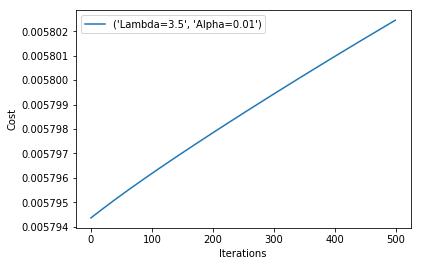

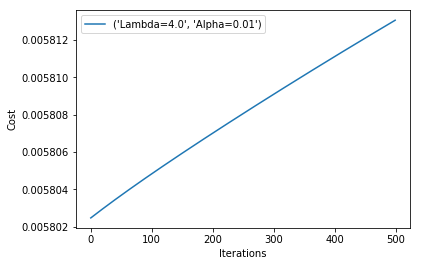

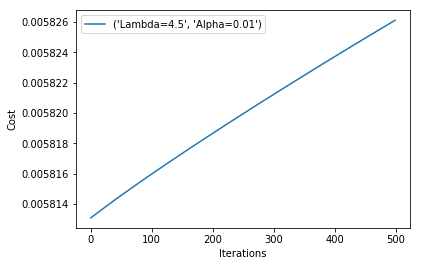

--------------------------------------------------------
--------------------------------------------------------
Alpha:0.03
--------------------------------------------------------


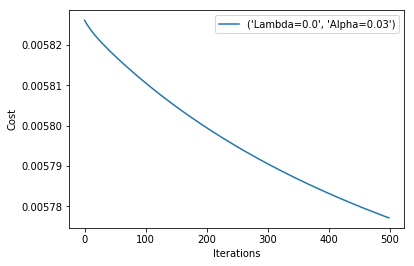

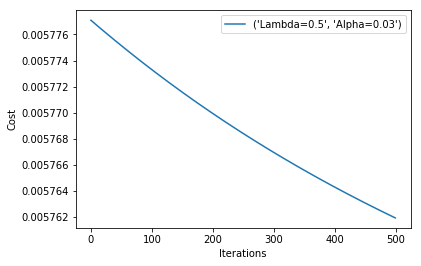

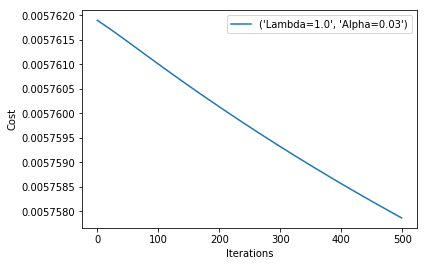

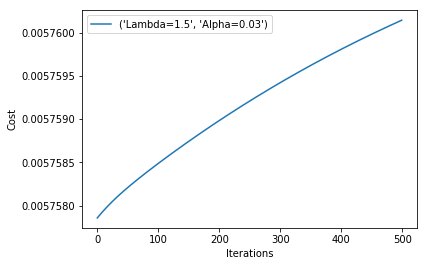

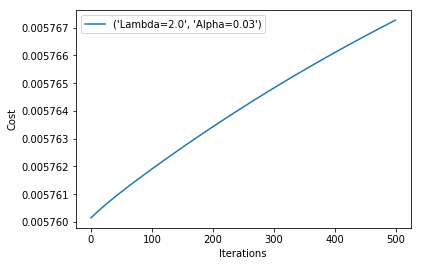

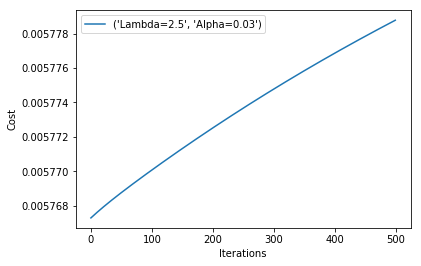

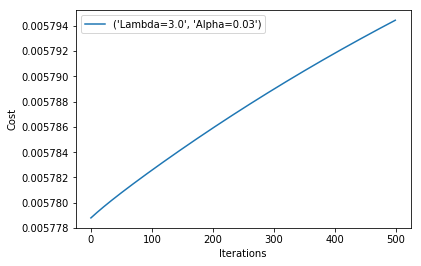

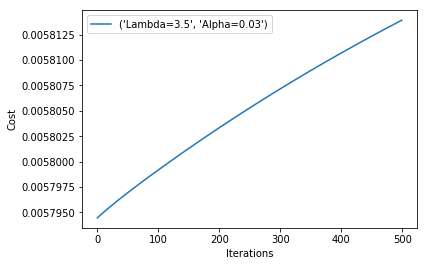

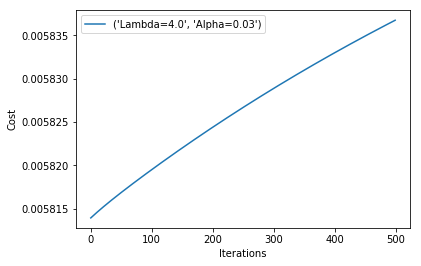

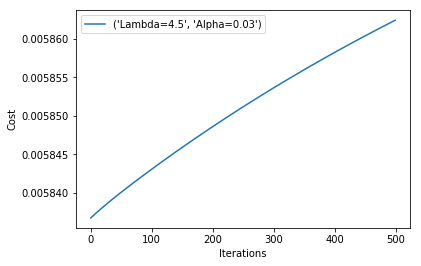

--------------------------------------------------------


In [33]:
# alpha = 0.03
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]

t = 10000/20 #No of iterations
it = np.arange(t)
lams = np.arange(0,5,0.5)
# cost_logs = []
# min_costs = []

for alpha in alphas:
    print("--------------------------------------------------------")
    print("Alpha:" + str(alpha))
    print("--------------------------------------------------------")
    for lam in lams:
        # lam=0
        cost_log = gd(x,y,w,alpha,t,lam) 
#         print("Cost: " + str(cost_log))
        
        plt.plot(it, cost_log, label=('Lambda='+str(lam),'Alpha='+str(alpha)))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()
    print("--------------------------------------------------------")
    
#     cost_logs.append((lam, cost_log))
#     min_costs.append((lam, min(cost_log)))
#     print("Lambda = " + str(lam) + ", Minimum cost = " + str(min(cost_log)))

# Conclusion

Minimum value for loss as obtained using gradient descent is .3711. The naive normal equation method for linear regression returns an accuracy of around 20 percent for all the trained inputs. The major differences between the gradient descent approach and the linear regression normal equation approach lie in a few major categories: 

### 1. Existence of matrix inverse 
The normal equation method requires the existence of the inverse of the matrix multiplication of the input matrix and its transpose. This inverse may or may not exist. Hence, this makes it less robust than the Gradient Descent algorithm, which poses no such bounds on the matrices. The Gradient Descent algorithm trades robustness for computational ease and accuracy.  

### 2. Correctness 
The values of weights from the normal method are known to be minimal by calculus. However, the same cannot be said of the values derived from Gradient Descent, whose weight values are randomly initialised and made to converge at a particular point - ideally the minimum. However, this process is long and we can never be sure that it's converging at the least possible value. That correct value is obtained easily using the normal equation technique.  

### 3. Effect of learning rate 
We also note that in case of Gradient Descent, there is another parameter introduced into the entire process of deriving the optimal weights - this parameter is called the learning rate. This learning rate helps us adjust the step value taken in going towards the optimal value of weights. This can significantly alter the process: taking a high value of learning rate will make us compute faster, but it won't always return the correct value. 

On the other hand, taking a very small value of the learning rate can help us achieve the optimal value of the weights, but this requires significantly higher amounts of computational power since the number of steps to be taken also increases by a large amount. 

This helps us establish the differences between the Normal Equation method and the Gradient Descent technique. Both have their own advantages and disadvantages, however in certain contexts we can prefer either based on our preferences. Robustness is certain with gradient descent, as well as flexibility in choosing our desired level of accuracy. However, if fault tolerance is minimal, we might prefer to use the normal method to obtain the values directly. 
